Task 1

In [2]:
import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

PyTorch Version: 2.7.1+cu126


Tutorial Example

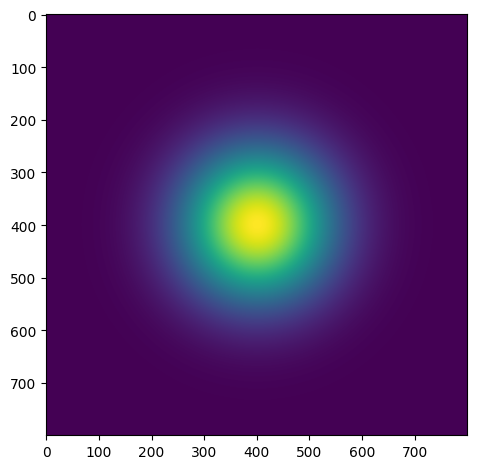

In [3]:
import matplotlib.pyplot as plt

# Grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4.0:0.01, -4.0:4.0:0.01]

# Load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.exp(-(x**2 + y**2) / 2.0)

# Plot
plt.imshow(z.cpu().numpy())
plt.tight_layout()
plt.show()

Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib

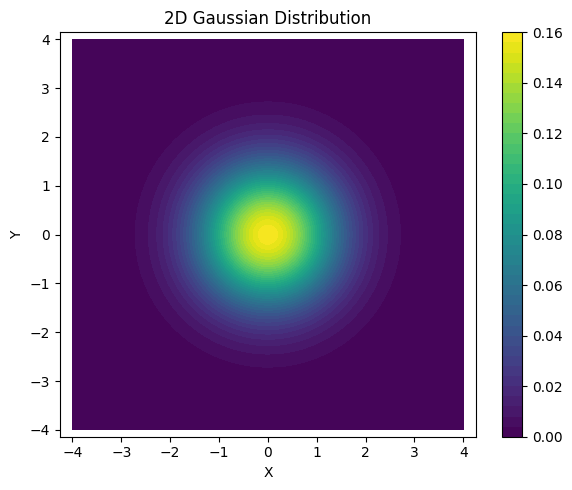

In [5]:
# Define parameters for the 2D Gaussian
mu_x, mu_y = 0.0, 0.0          # Mean
sigma_x, sigma_y = 1.0, 1.0    # Standard deviation

# Create a meshgrid over a 2D space
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Define the 2D Gaussian function
Z = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(
    -(((X - mu_x) ** 2) / (2 * sigma_x ** 2) + ((Y - mu_y) ** 2) / (2 * sigma_y ** 2))
)

# Plot the surface
plt.figure(figsize=(6, 5))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.tight_layout()
plt.show()

Prompt: Now that you have a Gaussian function generated by AI, use similar code to create a 2D sine func-
tion (i.e. a sune function from PyTorch whose angle is dependent on x and y coordinates of the pixels)
and another plot of the resulting Tensor that shows the ‘stripes’ of this function

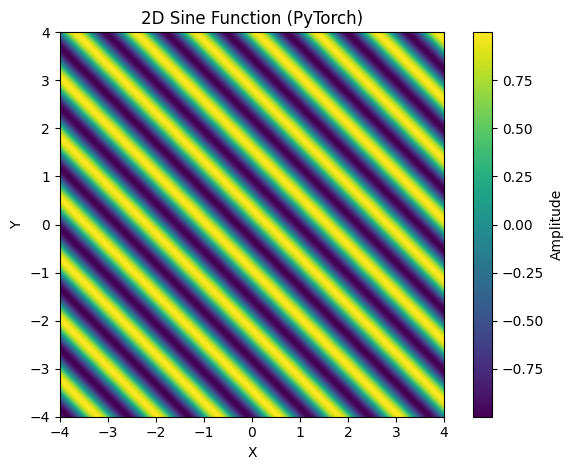

In [6]:
# Generate coordinate grid using torch
x = torch.linspace(-4, 4, 400)
y = torch.linspace(-4, 4, 400)
X, Y = torch.meshgrid(x, y, indexing='xy')

# Sine function with combined spatial frequency
kx, ky = 5.0, 5.0
Z = torch.sin(kx * X + ky * Y)

# Plot using matplotlib (convert to numpy)
plt.imshow(Z.numpy(), extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.title('2D Sine Function (PyTorch)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

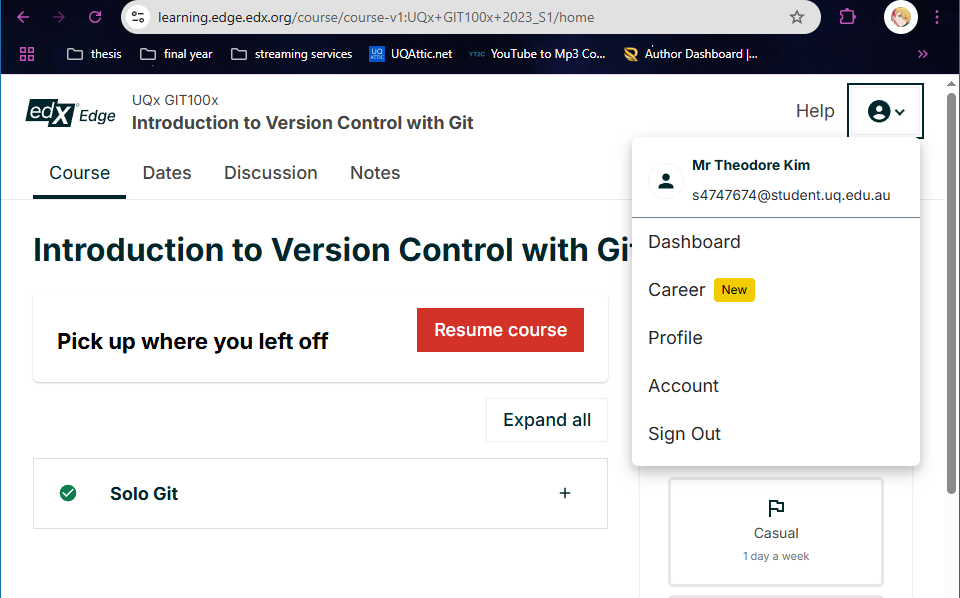